In [4]:
import matplotlib
import numpy as np
import sys
#import loompy
import pandas as pd
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=70)  # dots (pixels) per inch determine size of inline figures
sc.logging.print_versions()

scanpy==1.4 anndata==0.6.19 numpy==1.15.4 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [7]:
adata = sc.read_loom('/ibex/scratch/thimmamp/DataForSCDBProject/l5_all.loom', sparse = True, cleanup = False,
                     obs_names = 'CellID', var_names = 'Gene')


ModuleNotFoundError: No module named 'loompy'

In [3]:
adata.obs_names_make_unique()
adata.var_names_make_unique()

In [4]:
print(adata.shape)
#print(adata)
print(adata.obs_names[:10].tolist())
print(adata[:, 3])

(160796, 27998)
['10X82_2_TCTCTCACCAGTTA-', '10X82_2_TATTATCTACCAGA-', '10X82_2_TATCCCAGATGGCA-', '10X82_2_ATTACGTATGAATG-', '10X82_2_ATACGTCAATAAGG-', '10X82_2_TACAGTCTTCGGTC-', '10X81_2_CGTAACATTCGACA-', '10X81_3_TGATGAGATACACA-', '10X82_2_GCCAGGTAGGACAC-', '10X81_2_AGATCAGTCCGTAT-']
View of AnnData object with n_obs × n_vars = 160796 × 1 
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbab

In [5]:
#print(adata.X)
# Get the first three elements of second column.
print(adata[:3, 1].X)

[1. 1. 0.]


In [6]:
adata

AnnData object with n_obs × n_vars = 160796 × 27998 
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'C

In [7]:
adata.obs#['TaxonomyRank4']

Age AnalysisPool AnalysisProject  \
10X82_2_TCTCTCACCAGTTA-  p21, p23      Enteric      Adolescent   
10X82_2_TATTATCTACCAGA-  p21, p23      Enteric      Adolescent   
10X82_2_TATCCCAGATGGCA-  p21, p23      Enteric      Adolescent   
10X82_2_ATTACGTATGAATG-  p21, p23      Enteric      Adolescent   
10X82_2_ATACGTCAATAAGG-  p21, p23      Enteric      Adolescent   
10X82_2_TACAGTCTTCGGTC-  p21, p23      Enteric      Adolescent   
10X81_2_CGTAACATTCGACA-  p19, p21      Enteric      Adolescent   
10X81_3_TGATGAGATACACA-  p19, p21      Enteric      Adolescent   
10X82_2_GCCAGGTAGGACAC-  p21, p23      Enteric      Adolescent   
10X81_2_AGATCAGTCCGTAT-  p19, p21      Enteric      Adolescent   
10X82_2_ATGGCAGAGGTTAT-  p21, p23      Enteric      Adolescent   
10X82_2_TGAGCGTCCTCTTG-  p21, p23      Enteric      Adolescent   
10X82_2_AATGGAGTACTTGC-  p21, p23      Enteric      Adolescent   
10X81_2_AGTGGGTTGGACCC-  p19, p21      Enteric      Adolescent   
10X81_3_GCTAATCTAGCACA-  p19, p21      Enteric      Adolescent   
10X81_1_GGAGTAGCGTAATA-  p19, p21      Enteric      Adolescent   
10X81_1_CGAAAGTGAAATCA-  p19, p21      Enteric      Adolescent   
10X81_3_TTGAAAGCAGCCTC-  p19, p21      Enteric      Adolescent   
10X82_2_CGAGGGTCGGGTCT-  p21, p23      Enteric      Adolescent   
10X81_1_CGTAACATTAGCCA-  p19, p21      Enteric      Adolescent   
10X82_2_GGTGCGTGTTTGTG-  p21, p23      Enteric      Adolescent   
10X82_2_TTCTACAAGACACG-  p21, p23      Enteric      Adolescent   
10X81_1_GAGGGAGTGGGCTA-  p19, p21      Enteric      Adolescent   
10X82_2_CGCAGGTAAGAGGA-  p21, p23      Enteric      Adolescent   
10X82_2_CTACCCACATGTGT-  p21, p23      Enteric      Adolescent   
10X81_1_CCTTGTCTCGTATT-  p19, p21      Enteric      Adolescent   
10X82_2_ACGGGAGATGTTAG-  p21, p23      Enteric      Adolescent   
10X82_2_TGCCCTCTGTTGAG-  p21, p23      Enteric      Adolescent   
10X82_2_CAGAAAGAGTCGGT-  p21, p23      Enteric      Adolescent   
10X81_3_TGCGCCACTAAGTC-  p19, p21      Enteric      Adolescent   
...                           ...          ...             ...   
10X53_7_CGATCTAGAGTA-      p21-23          DRG      Adolescent   
10X43_2_CACTGATGACCA-         p20          DRG      Adolescent   
10X53_7_TAAATGGAGGGT-      p21-23          DRG      Adolescent   
10X53_7_CGGATGTAAGCC-      p21-23          DRG      Adolescent   
10X53_7_TACTTGGGGATG-      p21-23          DRG      Adolescent   
10X53_7_GTCATGCCGTAA-      p21-23          DRG      Adolescent   
10X43_2_GCATTGACCCTC-         p20          DRG      Adolescent   
10X53_7_AGACGAACTCAG-      p21-23          DRG      Adolescent   
10X43_2_GTATCTGTTACG-         p20          DRG      Adolescent   
10X43_2_GCTAACTGTCAG-         p20          DRG      Adolescent   
10X43_2_ATTCCTACTTTC-         p20          DRG      Adolescent   
10X53_7_TAACTGCGCATA-      p21-23          DRG      Adolescent   
10X43_2_ATGAACAGCCAT-         p20          DRG      Adolescent   
10X43_2_CTCAACAAGCAA-         p20          DRG      Adolescent   
10X53_7_AATCTGGATACC-      p21-23          DRG      Adolescent   
10X43_2_GATTCTTGAACC-         p20          DRG      Adolescent   
10X43_2_TTGGACTTCGTT-         p20          DRG      Adolescent   
10X53_7_TGTCCTATTCGG-      p21-23          DRG      Adolescent   
10X43_2_TGACGAGGTTCA-         p20          DRG      Adolescent   
10X53_7_CACCTGGGTCAT-      p21-23          DRG      Adolescent   
10X53_7_TGTCTGAGAGGC-      p21-23          DRG      Adolescent   
10X43_2_CAGTTGCTTGGA-         p20          DRG      Adolescent   
10X43_2_AGTCGATCGTGA-         p20          DRG      Adolescent   
10X43_2_GAAGCTTCGTAG-         p20          DRG      Adolescent   
10X43_2_CCATTGGGCAAG-         p20          DRG      Adolescent   
10X43_2_TACAACAGTCGT-         p20          DRG      Adolescent   
10X43_2_ATGATGGGTTAC-         p20          DRG      Adolescent   
10X43_2_GCAGCTTAGAGA-         p20          DRG      Adolescent   
10X53_7_GCGATGGGAGGT-      p21-23          DRG      Adolescent   
10X4

In [8]:
adata.var

Accession    _LogCV   _LogMean  _Selected   _Total  \
Cbln2          ENSMUSG00000024647  2.755888  -2.886499          0    190.0   
Ptchd2         ENSMUSG00000041544  2.970605  -5.549464          0     30.0   
P2rx2          ENSMUSG00000029503  2.355448  -3.161734          1    157.0   
Ptger4         ENSMUSG00000039942  2.143311  -4.030090          0     86.0   
Fam19a1        ENSMUSG00000059187  2.473562  -3.561537          0    119.0   
Slc12a7        ENSMUSG00000017756  1.802023  -3.090032          0    165.0   
Tlx2           ENSMUSG00000068327  0.665158   1.820352          0   4962.0   
Hoxa3          ENSMUSG00000079560  2.949781  -5.812498          0     25.0   
Adgrg6         ENSMUSG00000039116  1.260999  -2.321928          0    281.0   
Dgkg           ENSMUSG00000022861  1.666804  -2.623464          0    228.0   
Scn5a          ENSMUSG00000032511  2.968725  -4.390265          0     67.0   
Krt19          ENSMUSG00000020911  5.227663 -10.456354          0      1.0   
mt-Co3         ENSMUSG00000064358  4.064641  -8.134426          1      5.0   
Adra2a         ENSMUSG00000033717  3.061211  -5.030090          0     43.0   
Gpr149         ENSMUSG00000043441  1.988584  -3.125438          0    161.0   
Hoxb5          ENSMUSG00000038700  1.342832  -1.304070          1    569.0   
Trpc6          ENSMUSG00000031997  2.725286  -5.327071          0     35.0   
Phox2b         ENSMUSG00000012520  0.000000   0.000000          1      0.0   
Milr1          ENSMUSG00000040528  3.021155  -6.064037          0     21.0   
Sgcz           ENSMUSG00000039539  3.072952  -5.549464          0     30.0   
Kif22          ENSMUSG00000030677  1.878631  -3.098802          0    164.0   
Cntn5          ENSMUSG00000039488  3.638579  -7.286429          0      9.0   
Sox4           ENSMUSG00000076431  0.173598   1.017351          0   2844.0   
Rbms3          ENSMUSG00000039607  0.617370   1.041497          0   2892.0   
Wif1           ENSMUSG00000020218  5.068796  -7.286429          0      9.0   
Myl1           ENSMUSG00000061816  4.727150  -9.456354          1      2.0   
Dleu7          ENSMUSG00000048281  4.002984  -7.648999          0      7.0   
Arhgap6        ENSMUSG00000031355  3.219916  -6.456354          0     16.0   
Gm3336         ENSMUSG00000095026  2.425827  -4.701467          0     54.0   
6330403A02Rik  ENSMUSG00000053963  2.672903  -4.502158          0     62.0   
...                           ...       ...        ...        ...      ...   
6030471H07Rik  ENSMUSG00000085217  3.694439  -6.549464          0     15.0   
Orc4           ENSMUSG00000026761  1.384196  -2.543465          0    241.0   
Trmo           ENSMUSG00000028331  2.588627  -4.932792          0     46.0   
Ywhae          ENSMUSG00000020849  0.204079   3.131892          0  12316.0   
Ncbp1          ENSMUSG00000028330  1.538257  -2.878926          0    191.0   
Cdk5rap3       ENSMUSG00000018669  0.962810  -1.123199          0    645.0   
Mterf2         ENSMUSG00000049038  2.217531  -4.170952          0     78.0   
A230052G05Rik  ENSMUSG00000020887  2.798386  -5.456354          0     32.0   
Sugt1          ENSMUSG00000022024  0.643133   0.293515          0   1722.0   
Mpv17l2        ENSMUSG00000035559  0.741737  -0.262829          0   1171.0   
Vrk1           ENSMUSG00000021115  1.385457  -2.629806          0    227.0   
Commd7         ENSMUSG00000056941  0.977820  -0.140073          0   1275.0   
Tomm34         ENSMUSG00000018322  0.985098  -0.706485          0    861.0   
Tada3          ENSMUSG00000048930  1.196464  -1.728434          0    424.0   
P2rx3          ENSMUSG00000027071  1.905465  -2.175584          0    311.0   
Npm1           ENSMUSG00000057113  0.152322   1.894585          0   5224.0   
Actr10         ENSMUSG00000021076  0.761872  -0.090032          0   1320.0   
Atg16l1        ENSMUSG00000026289  1.437898  -2.157146          0    315.0   
Misp           ENSMUSG00000035852  2.769767  -4.347830          0     69.0   
Pfkfb3         ENSMUSG00000026773  1.459601  -

In [9]:
adata.var['Accession'][1:10,]

Ptchd2     ENSMUSG00000041544
P2rx2      ENSMUSG00000029503
Ptger4     ENSMUSG00000039942
Fam19a1    ENSMUSG00000059187
Slc12a7    ENSMUSG00000017756
Tlx2       ENSMUSG00000068327
Hoxa3      ENSMUSG00000079560
Adgrg6     ENSMUSG00000039116
Dgkg       ENSMUSG00000022861
Name: Accession, dtype: object

In [12]:
sc.settings.set_figure_params(dpi=80)

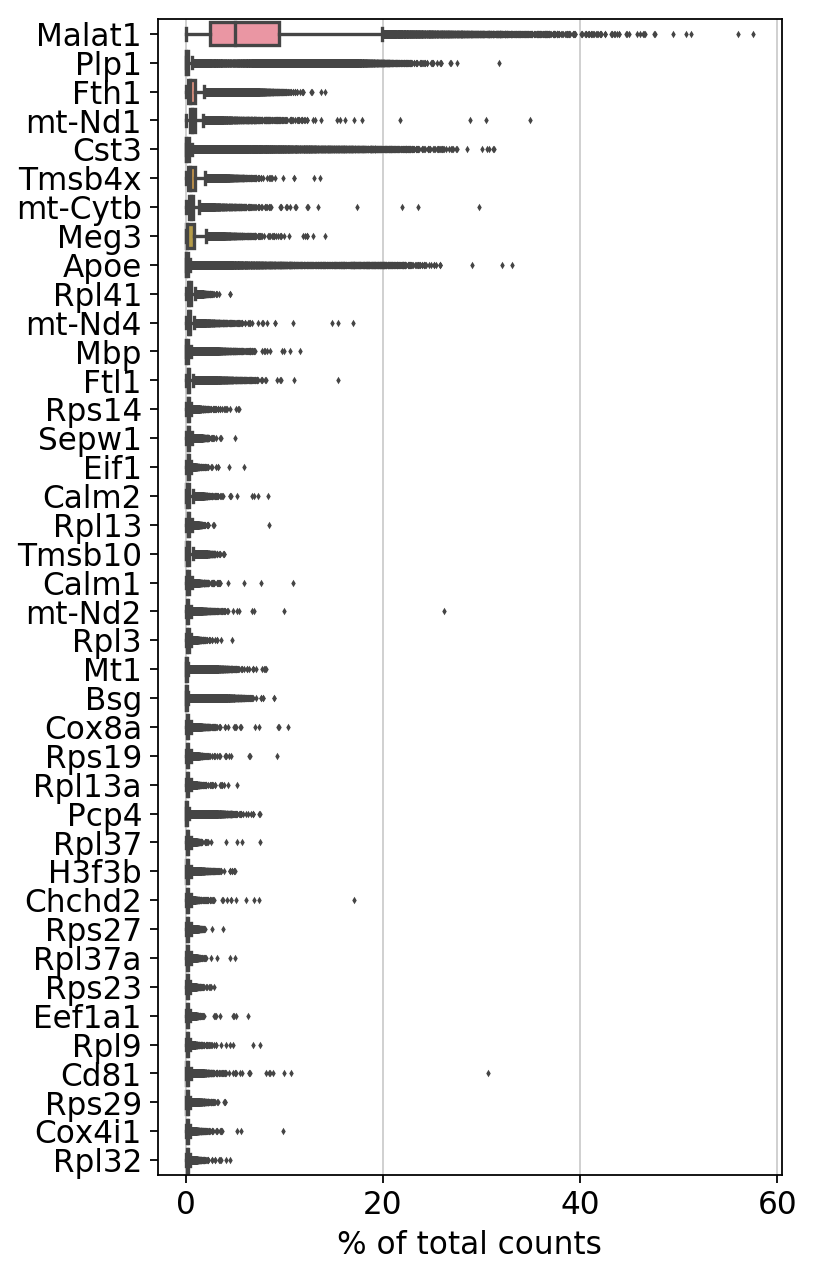

In [11]:
sc.pl.highest_expr_genes(adata, n_top=40)


In [13]:
adata_raw = adata

In [50]:
adata.raw

In [14]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=20)

filtered out 6894 cells that have less than 500 genes expressed
filtered out 8461 genes that are detected in less than 20 cells


In [16]:
mito_genes = adata.var_names.str.startswith('MT-')

In [17]:
mito_genes

array([False, False, False, ..., False, False, False])

In [18]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

In [19]:
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [20]:
adata.shape

(153902, 19537)

... storing 'Age' as categorical
... storing 'AnalysisPool' as categorical
... storing 'AnalysisProject' as categorical
... storing 'Bucket' as categorical
... storing 'CellConc' as categorical
... storing 'Cell_Conc' as categorical
... storing 'ChipID' as categorical
... storing 'Class' as categorical
... storing 'ClusterName' as categorical
... storing 'Comment' as categorical
... storing 'Comments' as categorical
... storing 'DateCaptured' as categorical
... storing 'Date_Captured' as categorical
... storing 'Description' as categorical
... storing 'Developmental_compartment' as categorical
... storing 'DonorID' as categorical
... storing 'Estimated Number of Cells' as categorical
... storing 'Flowcell' as categorical
... storing 'Fraction Reads in Cells' as categorical
... storing 'Label' as categorical
... storing 'Location_based_on' as categorical
... storing 'Mean Reads per Cell' as categorical
... storing 'Median Genes per Cell' as categorical
... storing 'Median UMI Counts per

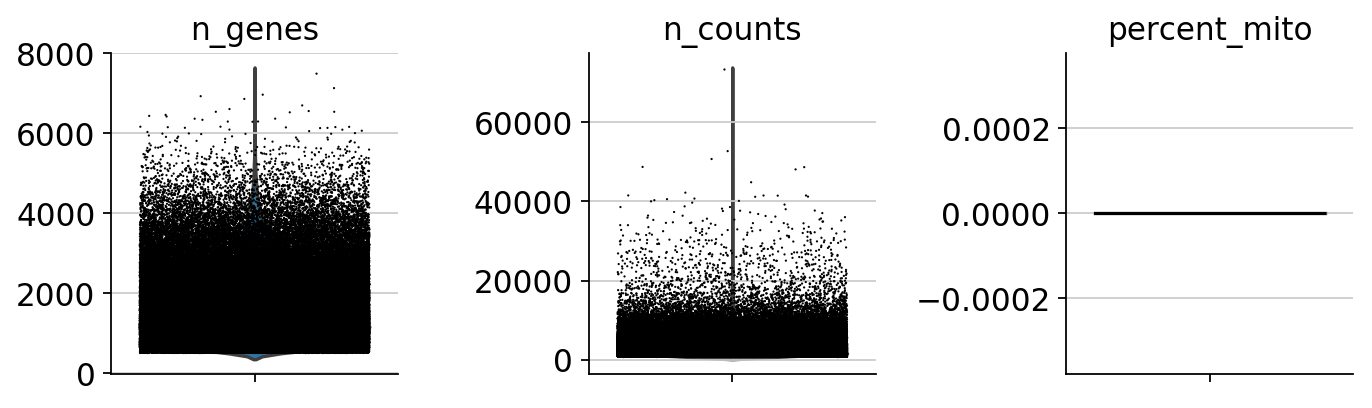

In [21]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

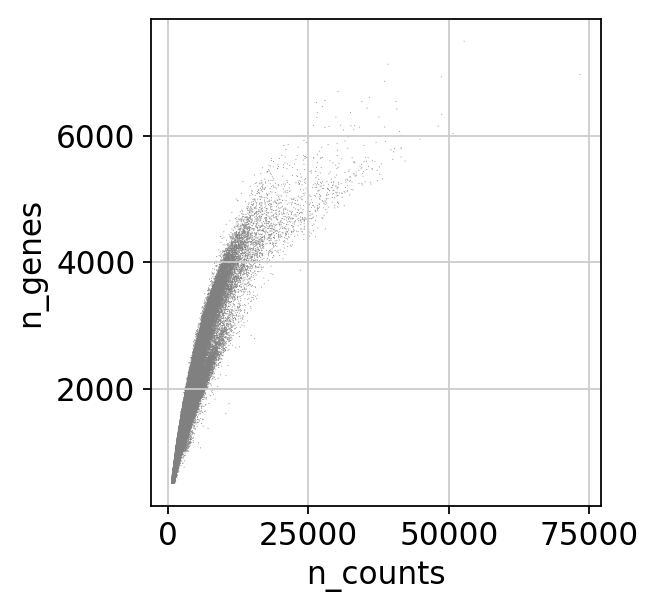

In [22]:
#sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [23]:
adata

AnnData object with n_obs × n_vars = 153902 × 19537 
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'C

In [24]:
adata = adata[adata.obs['n_genes'] < 5000, 
             ]
# adata = adata[adata.obs['percent_mito'] < 0.05, :]

In [25]:
adata.obs['n_genes']

10X82_2_TCTCTCACCAGTTA-    4966
10X82_2_TATCCCAGATGGCA-    4901
10X82_2_ATACGTCAATAAGG-    4441
10X82_2_TACAGTCTTCGGTC-    4177
10X81_3_TGATGAGATACACA-    3194
10X82_2_ATGGCAGAGGTTAT-    4557
10X82_2_AATGGAGTACTTGC-    4625
10X81_2_AGTGGGTTGGACCC-    2402
10X81_3_GCTAATCTAGCACA-    2919
10X81_1_GGAGTAGCGTAATA-     899
10X82_2_CGAGGGTCGGGTCT-    1638
10X81_1_CGTAACATTAGCCA-    3623
10X82_2_GGTGCGTGTTTGTG-    2908
10X82_2_TTCTACAAGACACG-    2044
10X81_1_GAGGGAGTGGGCTA-    4614
10X82_2_CGCAGGTAAGAGGA-    3540
10X82_2_CTACCCACATGTGT-    1553
10X81_1_CCTTGTCTCGTATT-    2189
10X82_2_ACGGGAGATGTTAG-    3208
10X82_2_TGCCCTCTGTTGAG-    4801
10X82_2_CAGAAAGAGTCGGT-    3182
10X81_3_TGCGCCACTAAGTC-    4824
10X81_2_AAGAGGTACAGACG-    2666
10X81_2_GGAGACACACGCTG-    4437
10X81_3_TATTCGTAGCTTGT-    1840
10X81_2_AGCAGGTCCAGTAT-    2731
10X81_3_AGACCGTTCTGTTT-    1962
10X82_2_TGTAAGTCATCCCT-    4458
10X81_2_AAACTGTAAGTTCC-    4601
10X81_3_CTGCTCAAGCTGAG-    2637
                           ... 
10X53_7_

In [26]:
adata_raw_1 = adata


In [99]:
adata_raw_1.write_loom('adata.raw_1')

AttributeError: 'AnnData' object has no attribute 'raw_1'

In [27]:
# Total-count normalize (library-size correct) the data matrix 
# to 10,000 reads per cell
# so that counts become comparable among cells
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [28]:
sc.pp.log1p(adata)

In [29]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


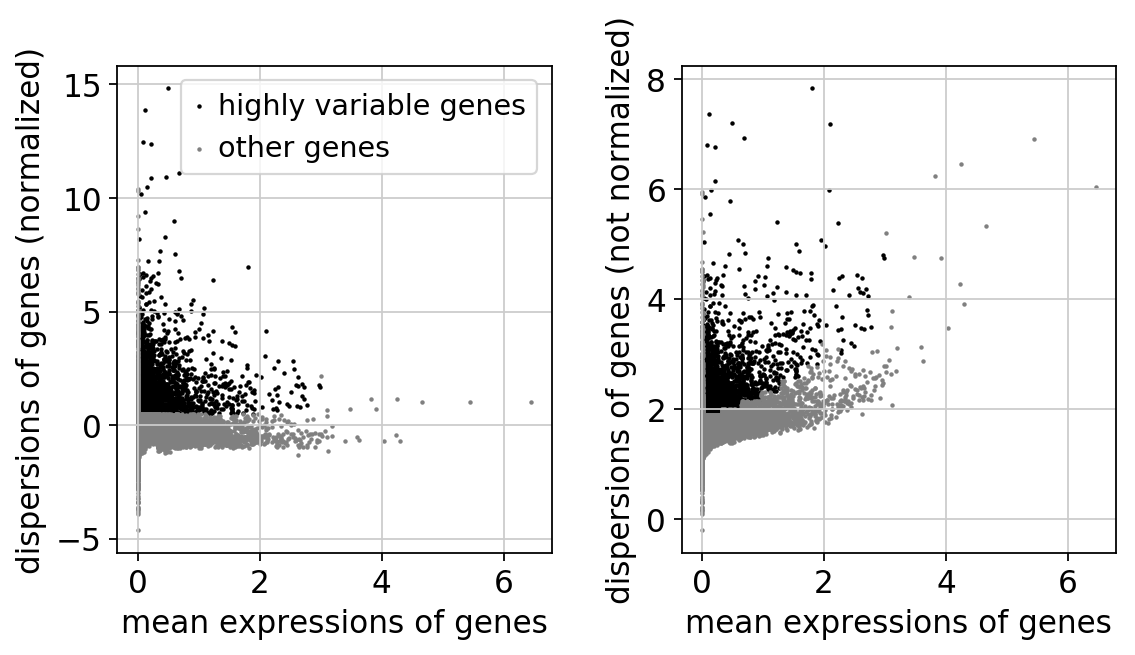

In [30]:
sc.pl.highly_variable_genes(adata)

In [31]:
adata = adata[:, adata.var['highly_variable']]

In [49]:
adata.shape

(153502, 3096)

In [32]:
print(adata.var_names[:].tolist())

['Cbln2', 'Ptger4', 'Fam19a1', 'Adgrg6', 'mt-Co3', 'Adra2a', 'Hoxb5', 'Cntn5', 'Sox4', 'Wif1', 'Myl1', 'Tcf7l2', 'mt-Nd3', 'Grin3a', 'Cpne4', 'mt-Co2', 'Gm10709', 'mt-Atp6', 'mt-Nd4l', 'Scgn', 'Bcl2', 'Rps12-ps3', 'Rpl23a-ps3', 'Meis1', 'Dcx', 'Klhl1', 'Actg1', 'Usp51', 'Pbx3', 'Kcnk2', 'Sumo2', 'Ucn3', 'Gpc6', 'Tac1', 'E530001K10Rik', 'Hoxa5', 'Plce1', 'Islr2', 'Tm4sf4', 'Grp', 'Tbx3os1', 'Nrp2', 'Cox8b', 'Bglap', 'Epha8', 'Adamts5', 'Cd1d1', 'S100a4', 'Eml5', 'Gpx3', 'Resp18', 'Magel2', 'Gal', 'Etv1', 'Rbp4', 'Tmem255b', 'D030055H07Rik', 'Npas4', 'Rprml', 'Ccnb2', 'Cdc20', 'Sapcd2', 'Cenpf', 'Cdca8', 'Nusap1', 'Ckap2', 'Ccna2', 'Aurka', 'Tuba1c', 'Racgap1', 'Emp1', 'Itih5', 'Cks2', 'Fam64a', 'Top2a', 'Hmgb2', 'Spc25', 'H2-Q4', 'Col15a1', 'Tubb6', 'Ube2c', 'Postn', 'Stmn1', 'Lockd', 'Ccnb1', 'Cenpa', 'Crym', 'Cdca3', 'Vim', 'Prc1', 'Col20a1', 'Nkd2', 'Tax1bp3', 'Hspa1b', 'Socs3', 'Casp4', 'Zfp36', 'Hspa1a', 'Cyr61', 'Gm12216', 'Cxcl1', 'Dnajb1', 'Rrad', 'Prss23', 'Pdlim1', 'Art3', 'Ma

In [105]:
adata.obs['Clusters']

10X82_2_TCTCTCACCAGTTA-      0
10X82_2_TATCCCAGATGGCA-      0
10X82_2_ATACGTCAATAAGG-      0
10X82_2_TACAGTCTTCGGTC-      0
10X81_3_TGATGAGATACACA-      0
10X82_2_ATGGCAGAGGTTAT-      0
10X82_2_AATGGAGTACTTGC-      0
10X81_2_AGTGGGTTGGACCC-      0
10X81_3_GCTAATCTAGCACA-      0
10X81_1_GGAGTAGCGTAATA-      0
10X82_2_CGAGGGTCGGGTCT-      0
10X81_1_CGTAACATTAGCCA-      0
10X82_2_GGTGCGTGTTTGTG-      0
10X82_2_TTCTACAAGACACG-      0
10X81_1_GAGGGAGTGGGCTA-      0
10X82_2_CGCAGGTAAGAGGA-      0
10X82_2_CTACCCACATGTGT-      0
10X81_1_CCTTGTCTCGTATT-      0
10X82_2_ACGGGAGATGTTAG-      0
10X82_2_TGCCCTCTGTTGAG-      0
10X82_2_CAGAAAGAGTCGGT-      0
10X81_3_TGCGCCACTAAGTC-      0
10X81_2_AAGAGGTACAGACG-      0
10X81_2_GGAGACACACGCTG-      0
10X81_3_TATTCGTAGCTTGT-      0
10X81_2_AGCAGGTCCAGTAT-      0
10X81_3_AGACCGTTCTGTTT-      0
10X82_2_TGTAAGTCATCCCT-      0
10X81_2_AAACTGTAAGTTCC-      0
10X81_3_CTGCTCAAGCTGAG-      0
                          ... 
10X53_7_ATAAACGTTAGC-      264
10X43_2_

In [95]:
adata.write_loom

In [33]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])


regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:04:26.76)


In [34]:
# Scale each gene to unit variance
# Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)


## PCA

In [35]:
sc.tl.pca(adata, svd_solver='arpack')

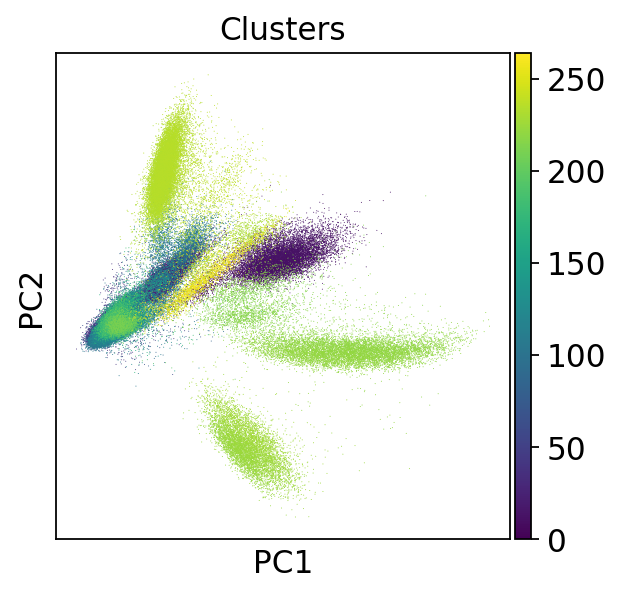

In [36]:
sc.pl.pca(adata, color='Clusters')

In [128]:
?sc.pl.pca

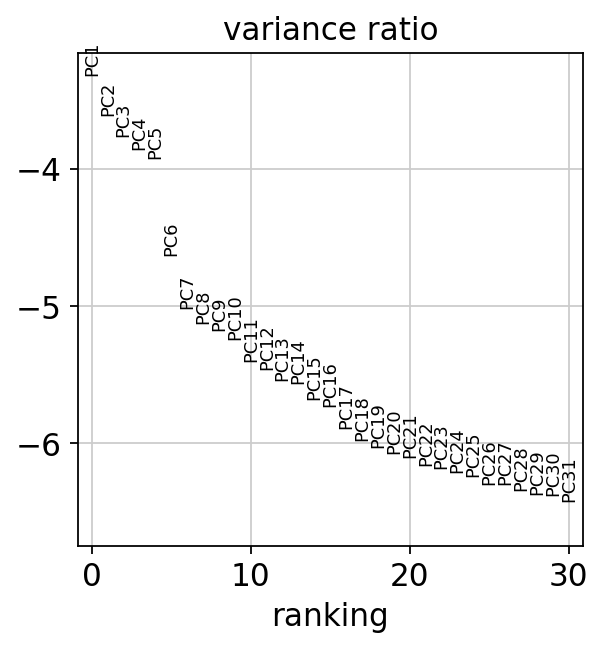

In [37]:
sc.pl.pca_variance_ratio(adata, log=True)


In [ ]:
adata.write(results_file)

In [117]:
adata

AnnData object with n_obs × n_vars = 153502 × 3096 
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cl

In [38]:
adata.obsm['X_pca'].shape

(153502, 50)

## Computing the neighborhood graph

In [39]:
sc.pp.neighbors(adata, knn = True, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:01:01.87) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [121]:
?sc.pp.neighbors

## Embedding the neighborhood graph

In [ ]:
#We advertise embedding the graph in 2 dimensions using UMAP (McInnes et al., 2018), see below. It is potentially more faithful to the global connectivity of the manifold than tSNE, i.e., it better preservers trajectories. In some ocassions, you might still observe disconnected clusters and similar connectivity violations. They can usually be remedied by running:

#tl.paga(adata)
#pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#tl.umap(adata, init_pos='paga')

In [40]:
sc.tl.umap(adata)


computing UMAP
    finished (0:04:25.63) --> added
    'X_umap', UMAP coordinates (adata.obsm)


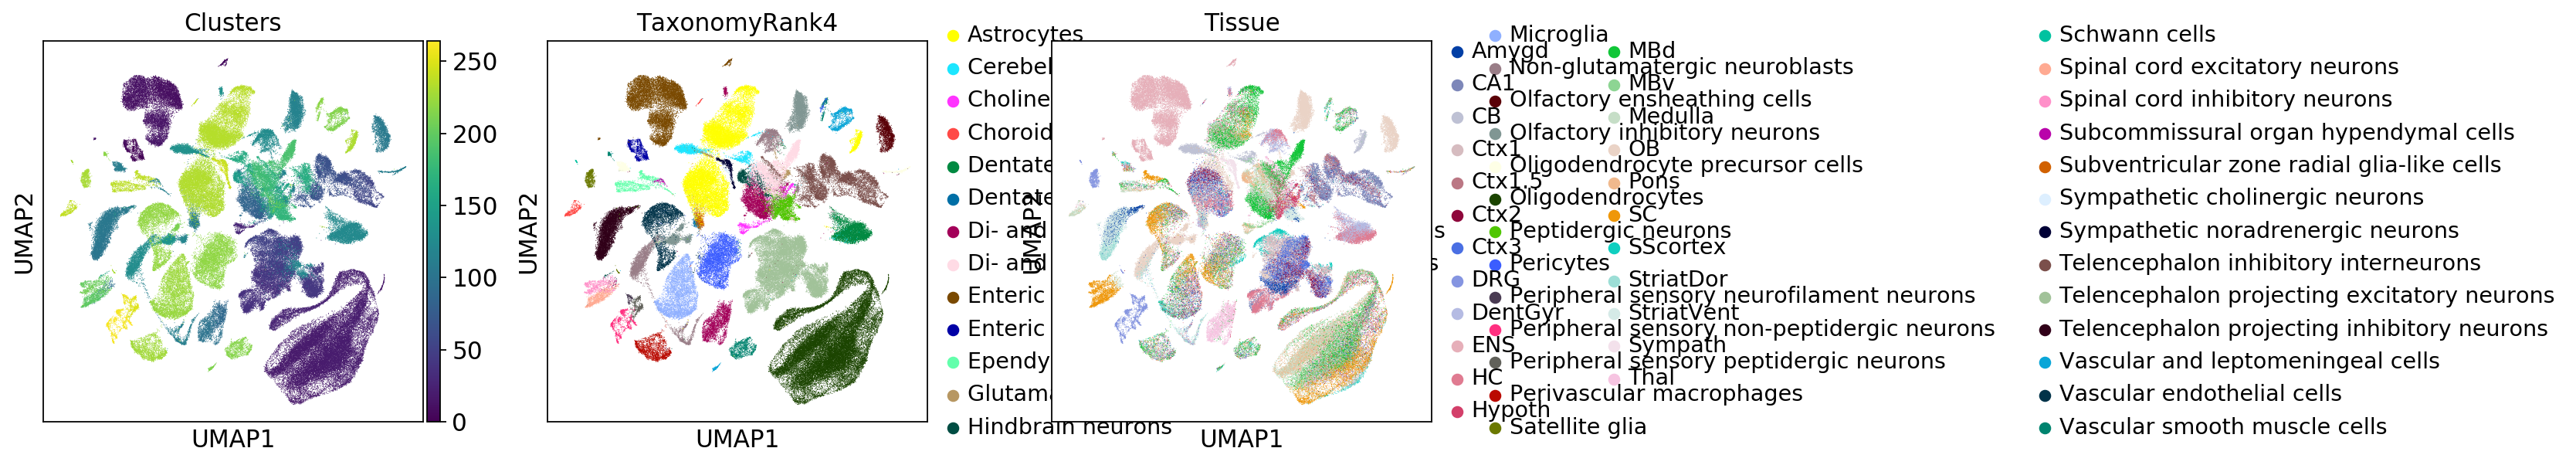

In [153]:
sc.pl.umap(adata, color=['Clusters', 'TaxonomyRank4', 'Tissue'])

In [152]:
from tkinter import *
COLORS = ['snow', 'ghost white', 'white smoke', 'gainsboro', 'floral white', 'old lace',
    'linen', 'antique white', 'papaya whip', 'blanched almond', 'bisque', 'peach puff',
    'navajo white', 'lemon chiffon', 'mint cream', 'azure', 'alice blue', 'lavender',
    'lavender blush', 'misty rose', 'dark slate gray', 'dim gray', 'slate gray',
    'light slate gray', 'gray', 'light grey', 'midnight blue', 'navy', 'cornflower blue', 'dark slate blue',
    'slate blue', 'medium slate blue', 'light slate blue', 'medium blue', 'royal blue',  'blue',
    'dodger blue', 'deep sky blue', 'sky blue', 'light sky blue', 'steel blue', 'light steel blue',
    'light blue', 'powder blue', 'pale turquoise', 'dark turquoise', 'medium turquoise', 'turquoise',
    'cyan', 'light cyan', 'cadet blue', 'medium aquamarine', 'aquamarine', 'dark green', 'dark olive green',
    'dark sea green', 'sea green', 'medium sea green', 'light sea green', 'pale green', 'spring green',
    'lawn green', 'medium spring green', 'green yellow', 'lime green', 'yellow green',
    'forest green', 'olive drab', 'dark khaki', 'khaki', 'pale goldenrod', 'light goldenrod yellow',
    'light yellow', 'yellow', 'gold', 'light goldenrod', 'goldenrod', 'dark goldenrod', 'rosy brown',
    'indian red', 'saddle brown', 'sandy brown',
    'dark salmon', 'salmon', 'light salmon', 'orange', 'dark orange',
    'coral', 'light coral', 'tomato', 'orange red', 'red', 'hot pink', 'deep pink', 'pink', 'light pink',
    'pale violet red', 'maroon', 'medium violet red', 'violet red',
    'medium orchid', 'dark orchid', 'dark violet', 'blue violet', 'purple', 'medium purple',
    'thistle', 'snow2', 'snow3',
    'snow4', 'seashell2', 'seashell3', 'seashell4', 'AntiqueWhite1', 'AntiqueWhite2',
    'AntiqueWhite3', 'AntiqueWhite4', 'bisque2', 'bisque3', 'bisque4', 'PeachPuff2',
    'PeachPuff3', 'PeachPuff4', 'NavajoWhite2', 'NavajoWhite3', 'NavajoWhite4',
    'LemonChiffon2', 'LemonChiffon3', 'LemonChiffon4', 'cornsilk2', 'cornsilk3',
    'cornsilk4', 'ivory2', 'ivory3', 'ivory4', 'honeydew2', 'honeydew3', 'honeydew4',
    'LavenderBlush2', 'LavenderBlush3', 'LavenderBlush4', 'MistyRose2', 'MistyRose3',
    'MistyRose4', 'azure2', 'azure3', 'azure4', 'SlateBlue1', 'SlateBlue2', 'SlateBlue3',
    'SlateBlue4', 'RoyalBlue1', 'RoyalBlue2', 'RoyalBlue3', 'RoyalBlue4', 'blue2', 'blue4',
    'DodgerBlue2', 'DodgerBlue3', 'DodgerBlue4', 'SteelBlue1', 'SteelBlue2',
    'SteelBlue3', 'SteelBlue4', 'DeepSkyBlue2', 'DeepSkyBlue3', 'DeepSkyBlue4',
    'SkyBlue1', 'SkyBlue2', 'SkyBlue3', 'SkyBlue4', 'LightSkyBlue1', 'LightSkyBlue2',
    'LightSkyBlue3', 'LightSkyBlue4', 'SlateGray1', 'SlateGray2', 'SlateGray3',
    'SlateGray4', 'LightSteelBlue1', 'LightSteelBlue2', 'LightSteelBlue3',
    'LightSteelBlue4', 'LightBlue1', 'LightBlue2', 'LightBlue3', 'LightBlue4',
    'LightCyan2', 'LightCyan3', 'LightCyan4', 'PaleTurquoise1', 'PaleTurquoise2',
    'PaleTurquoise3', 'PaleTurquoise4', 'CadetBlue1', 'CadetBlue2', 'CadetBlue3',
    'CadetBlue4', 'turquoise1', 'turquoise2', 'turquoise3', 'turquoise4', 'cyan2', 'cyan3',
    'cyan4', 'DarkSlateGray1', 'DarkSlateGray2', 'DarkSlateGray3', 'DarkSlateGray4',
    'aquamarine2', 'aquamarine4', 'DarkSeaGreen1', 'DarkSeaGreen2', 'DarkSeaGreen3',
    'DarkSeaGreen4', 'SeaGreen1', 'SeaGreen2', 'SeaGreen3', 'PaleGreen1', 'PaleGreen2',
    'PaleGreen3', 'PaleGreen4', 'SpringGreen2', 'SpringGreen3', 'SpringGreen4',
    'green2', 'green3', 'green4', 'chartreuse2', 'chartreuse3', 'chartreuse4',
    'OliveDrab1', 'OliveDrab2', 'OliveDrab4', 'DarkOliveGreen1', 'DarkOliveGreen2',
    'DarkOliveGreen3', 'DarkOliveGreen4', 'khaki1', 'khaki2', 'khaki3', 'khaki4',
    'LightGoldenrod1', 'LightGoldenrod2', 'LightGoldenrod3', 'LightGoldenrod4',
    'LightYellow2', 'LightYellow3', 'LightYellow4', 'yellow2', 'yellow3', 'yellow4',
    'gold2', 'gold3', 'gold4', 'goldenrod1', 'goldenrod2', 'goldenrod3', 'goldenrod4',
    'DarkGoldenrod1', 'DarkGoldenrod2', 'DarkGoldenrod3', 'DarkGoldenrod4',
    'RosyBrown1', 'RosyBrown2', 'RosyBrown3']

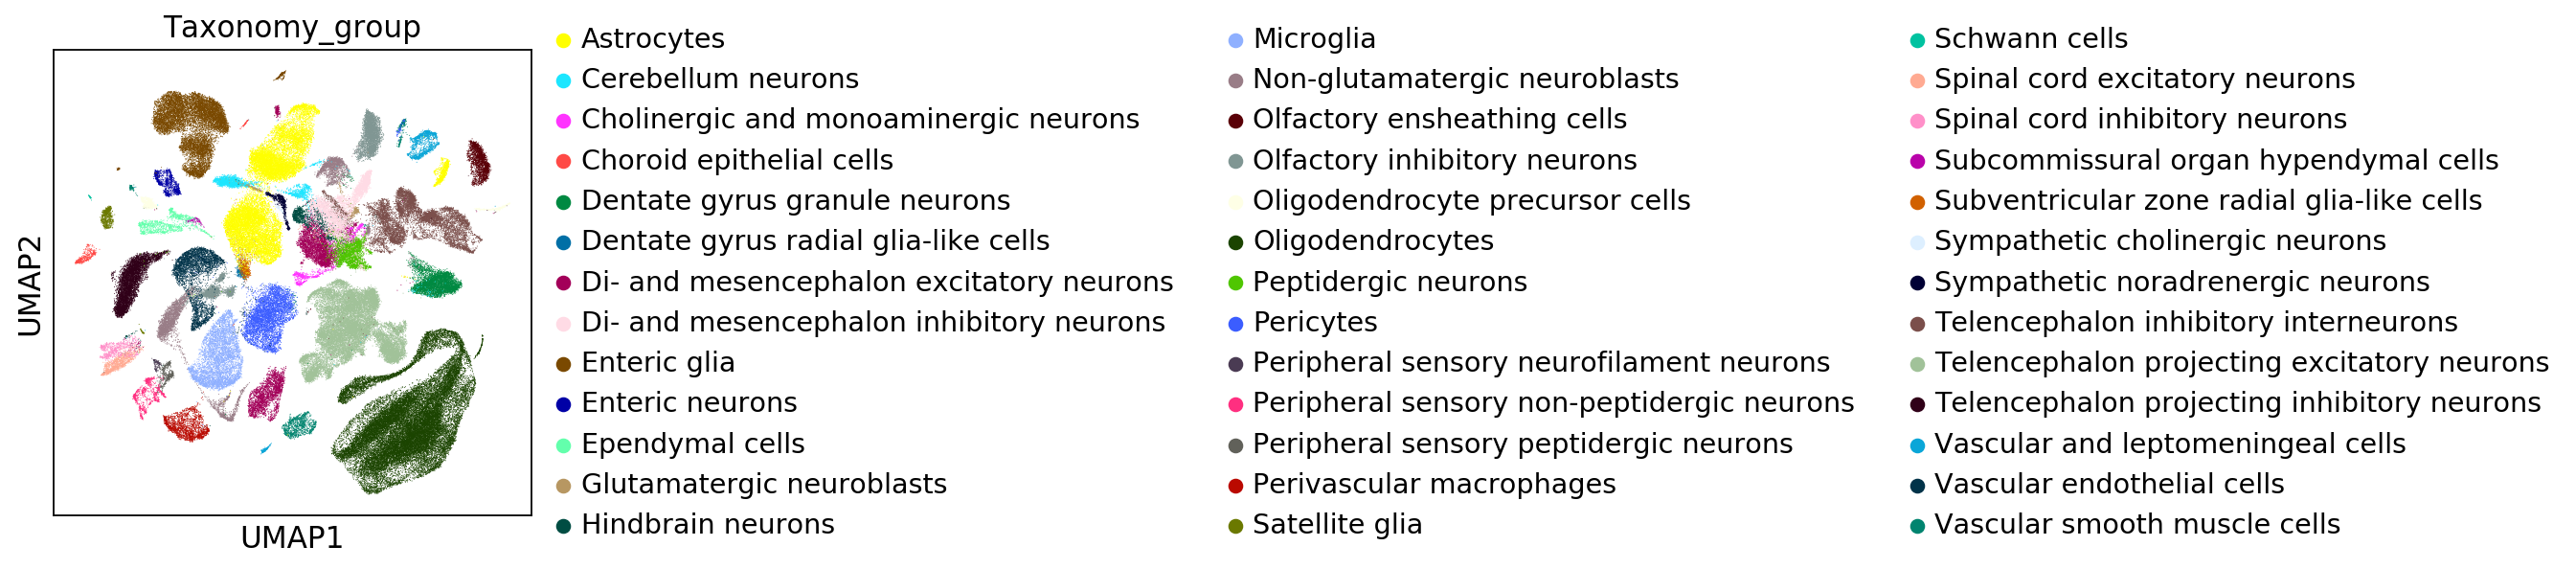

In [41]:
sc.pl.umap(adata, color=[ 'Taxonomy_group'])


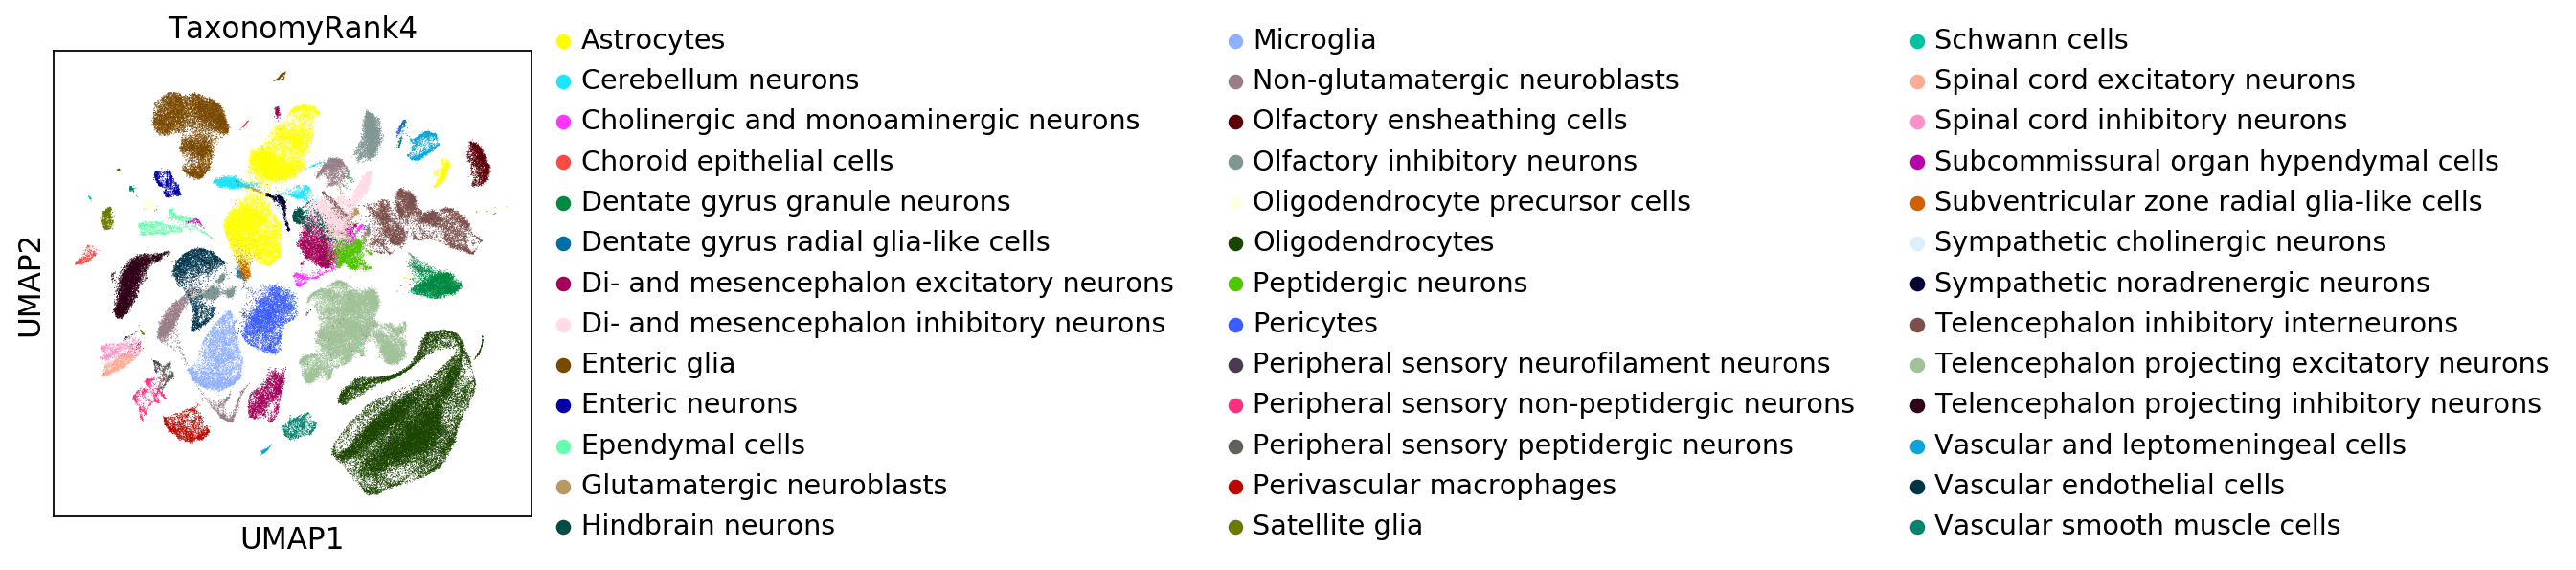

In [42]:
sc.pl.umap(adata, color=[ 'TaxonomyRank4'])

In [43]:
import random
# get 265 colors randomly
random.seed(0)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            for i in range(265)]

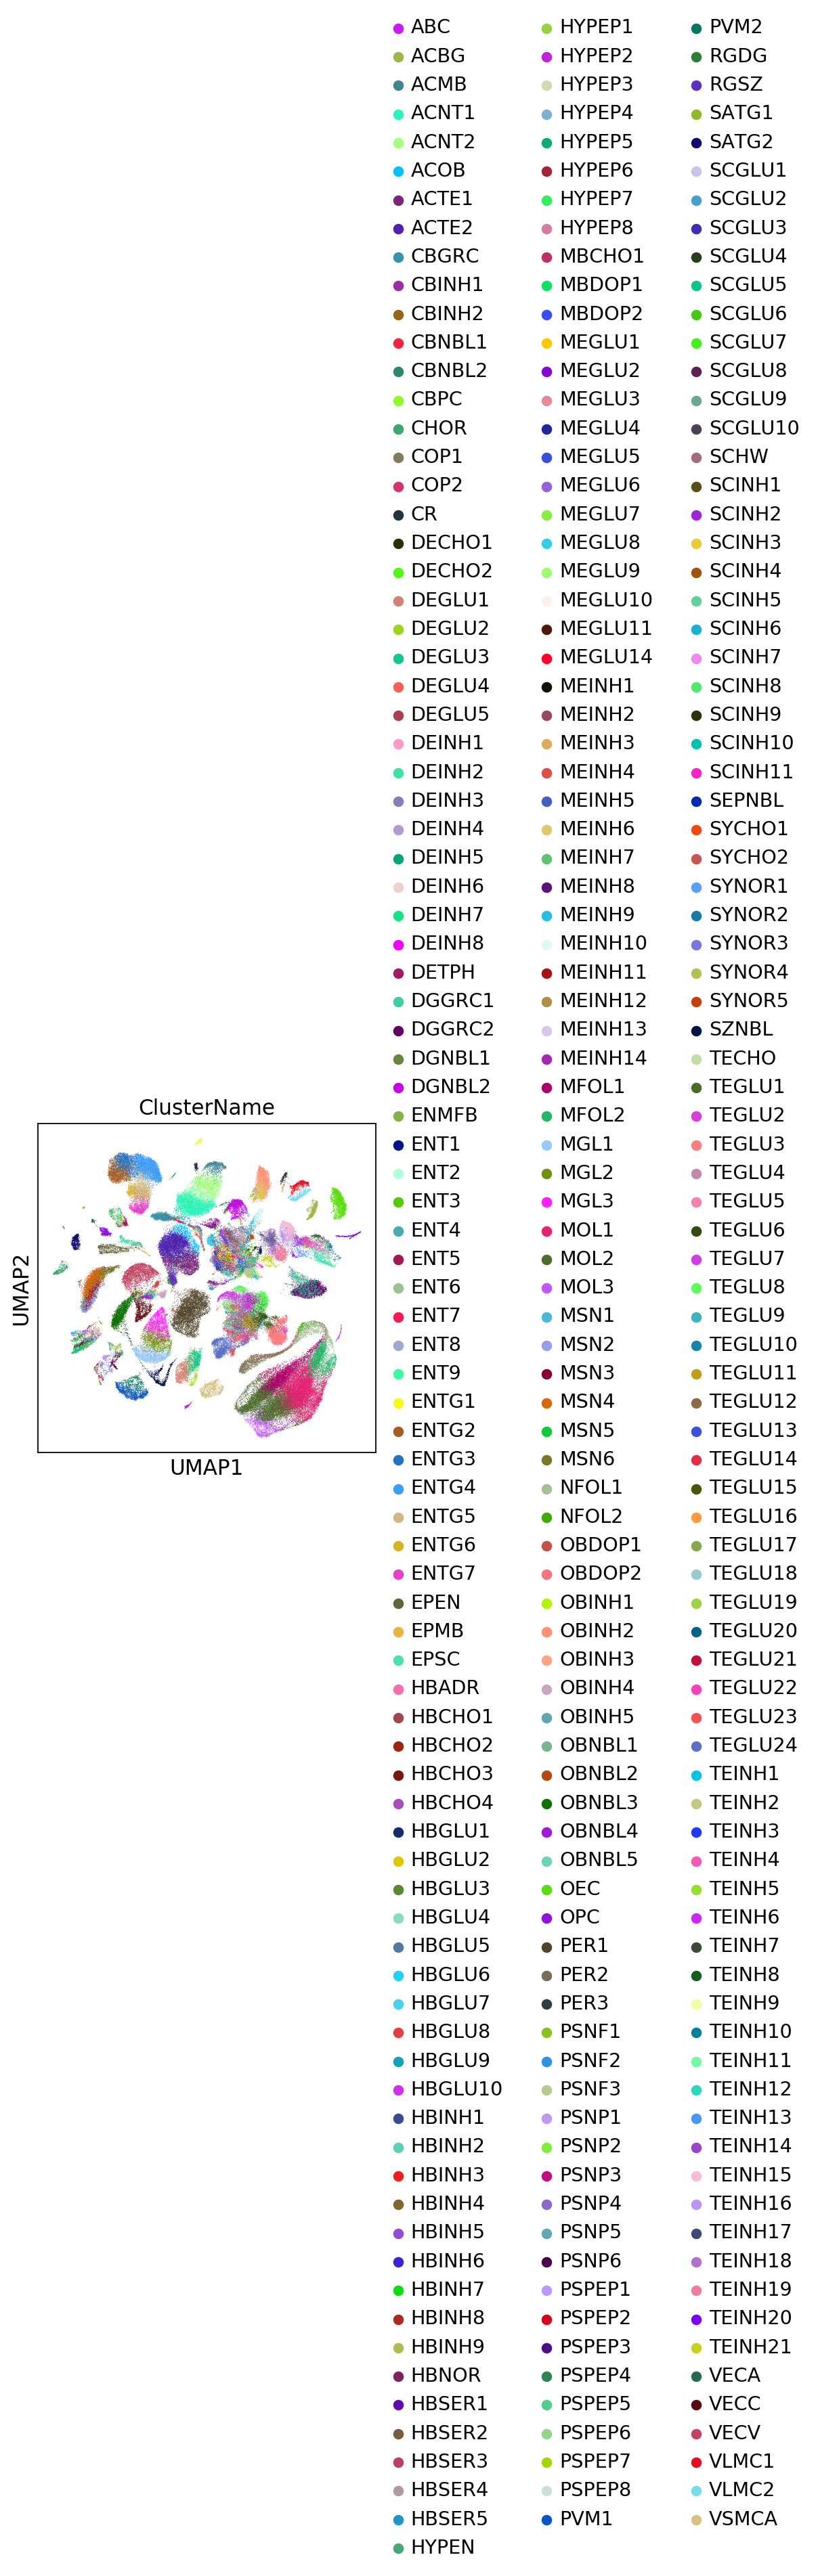

In [44]:
sc.pl.umap(adata, color=[ 'ClusterName'], palette = color)

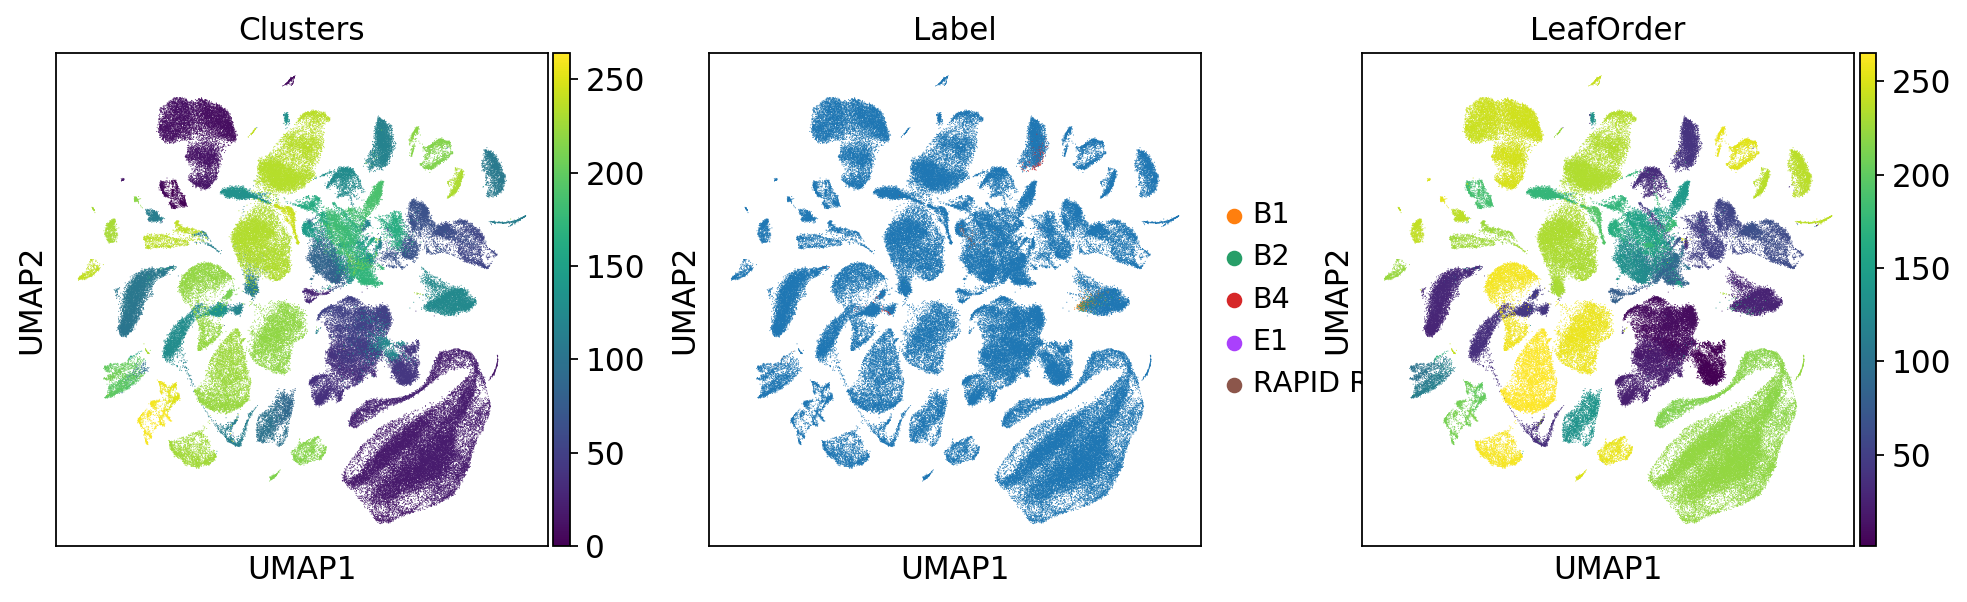

In [126]:
sc.pl.umap(adata, color=['Clusters', 'Label', 'LeafOrder'], use_raw=False)

## Clustering the neighborhood graph

In [45]:
sc.tl.louvain(adata)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:55.06) --> found 49 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


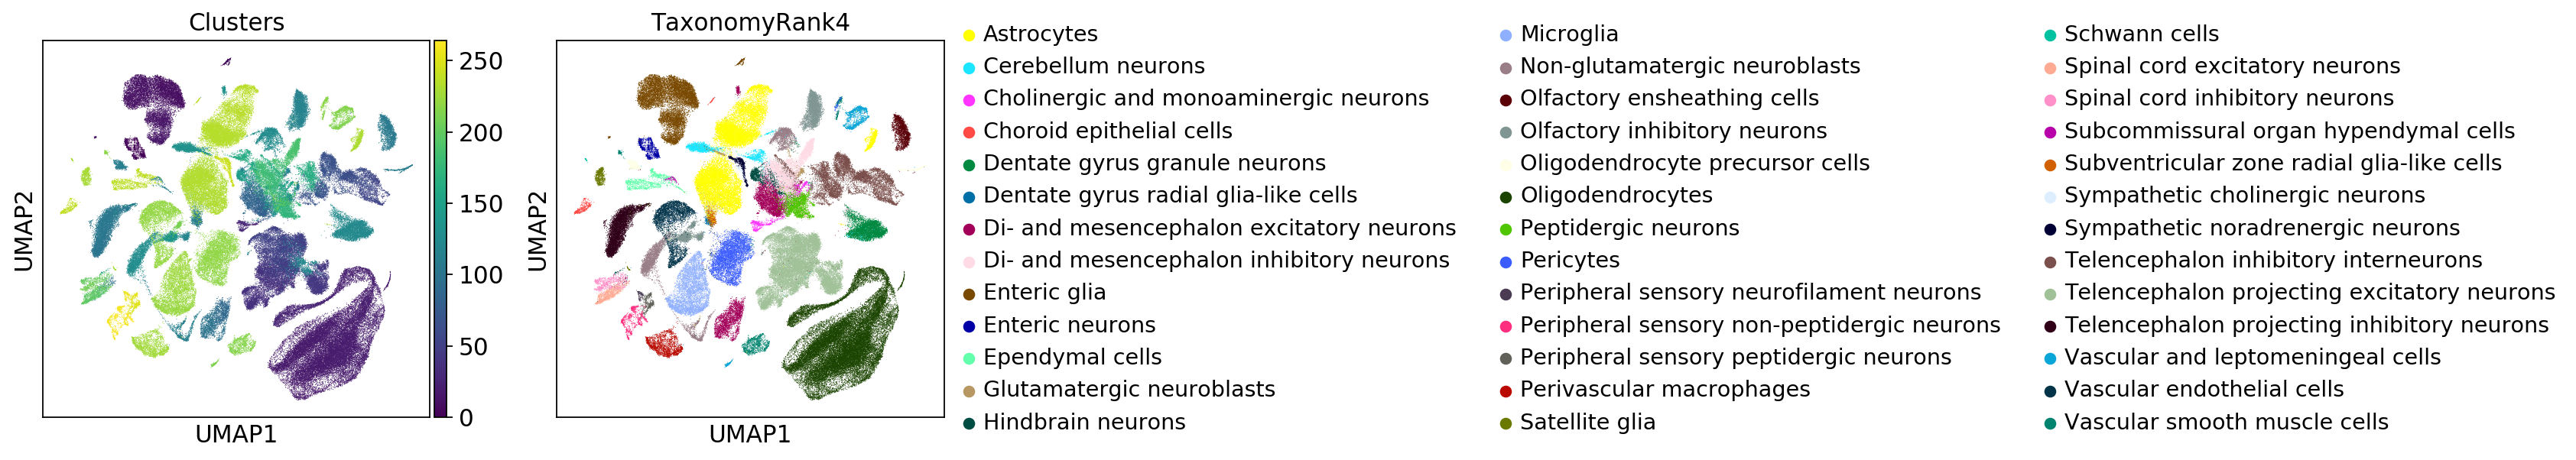

In [48]:
sc.pl.umap(adata, color=['Clusters', 'TaxonomyRank4'])

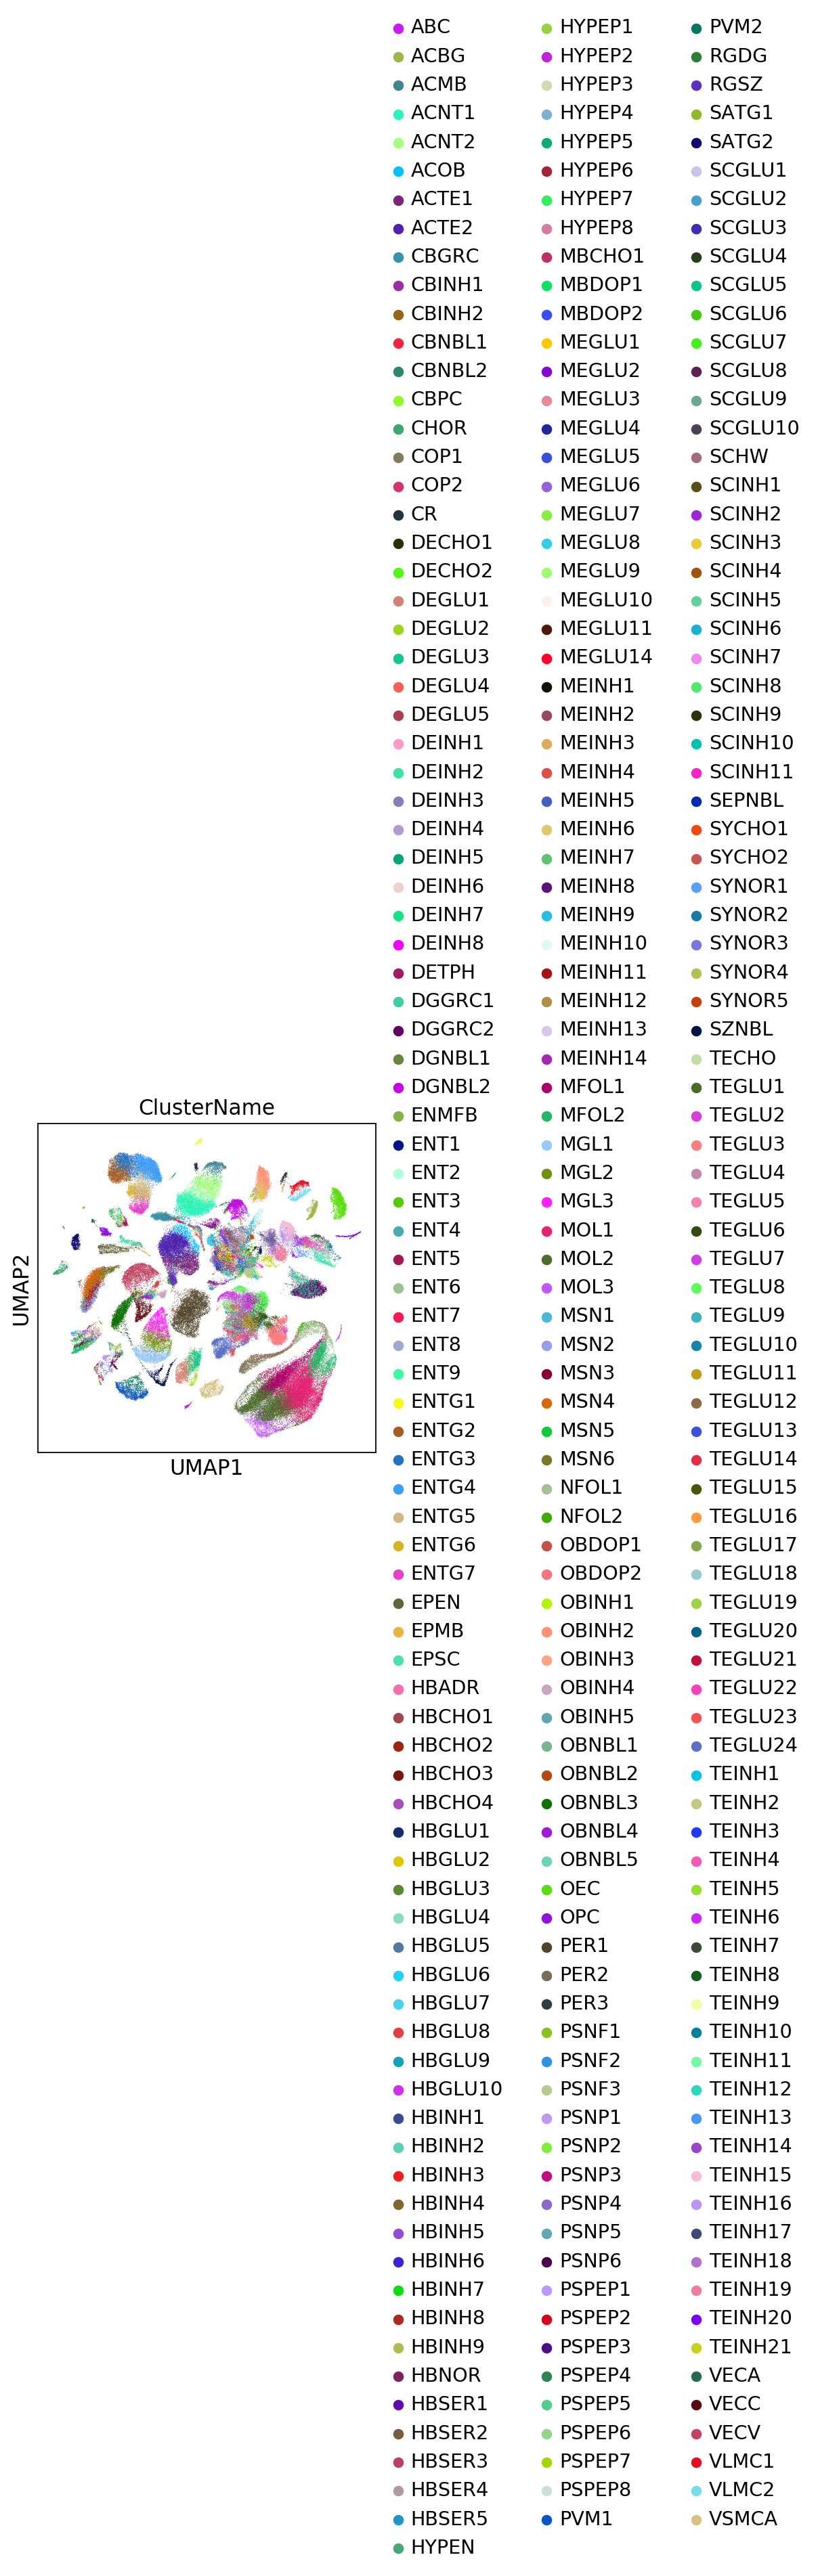

In [47]:
sc.pl.umap(adata, color=[ 'ClusterName'], palette = color)

In [1]:
from __future__ import division

import matplotlib.pyplot as plt

import random
# get 265 colors randomly
random.seed(0)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            for i in range(265)]


# plot it in a table
n = 265
ncols = 5
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / nrows
w = X / ncols

for i, name in enumerate(range(265)):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    # show number
    ax.text(xi_text, y, name+1, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')
    # show color
    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=color[name], linewidth=(h * 0.6))

# render
ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

<Figure size 800x500 with 1 Axes>

In [ ]:
adata.write(results_file)

## Finding marker genes

In [ ]:
# simple way by t-test
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity


ranking genes
    finished (0:13:03.76) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


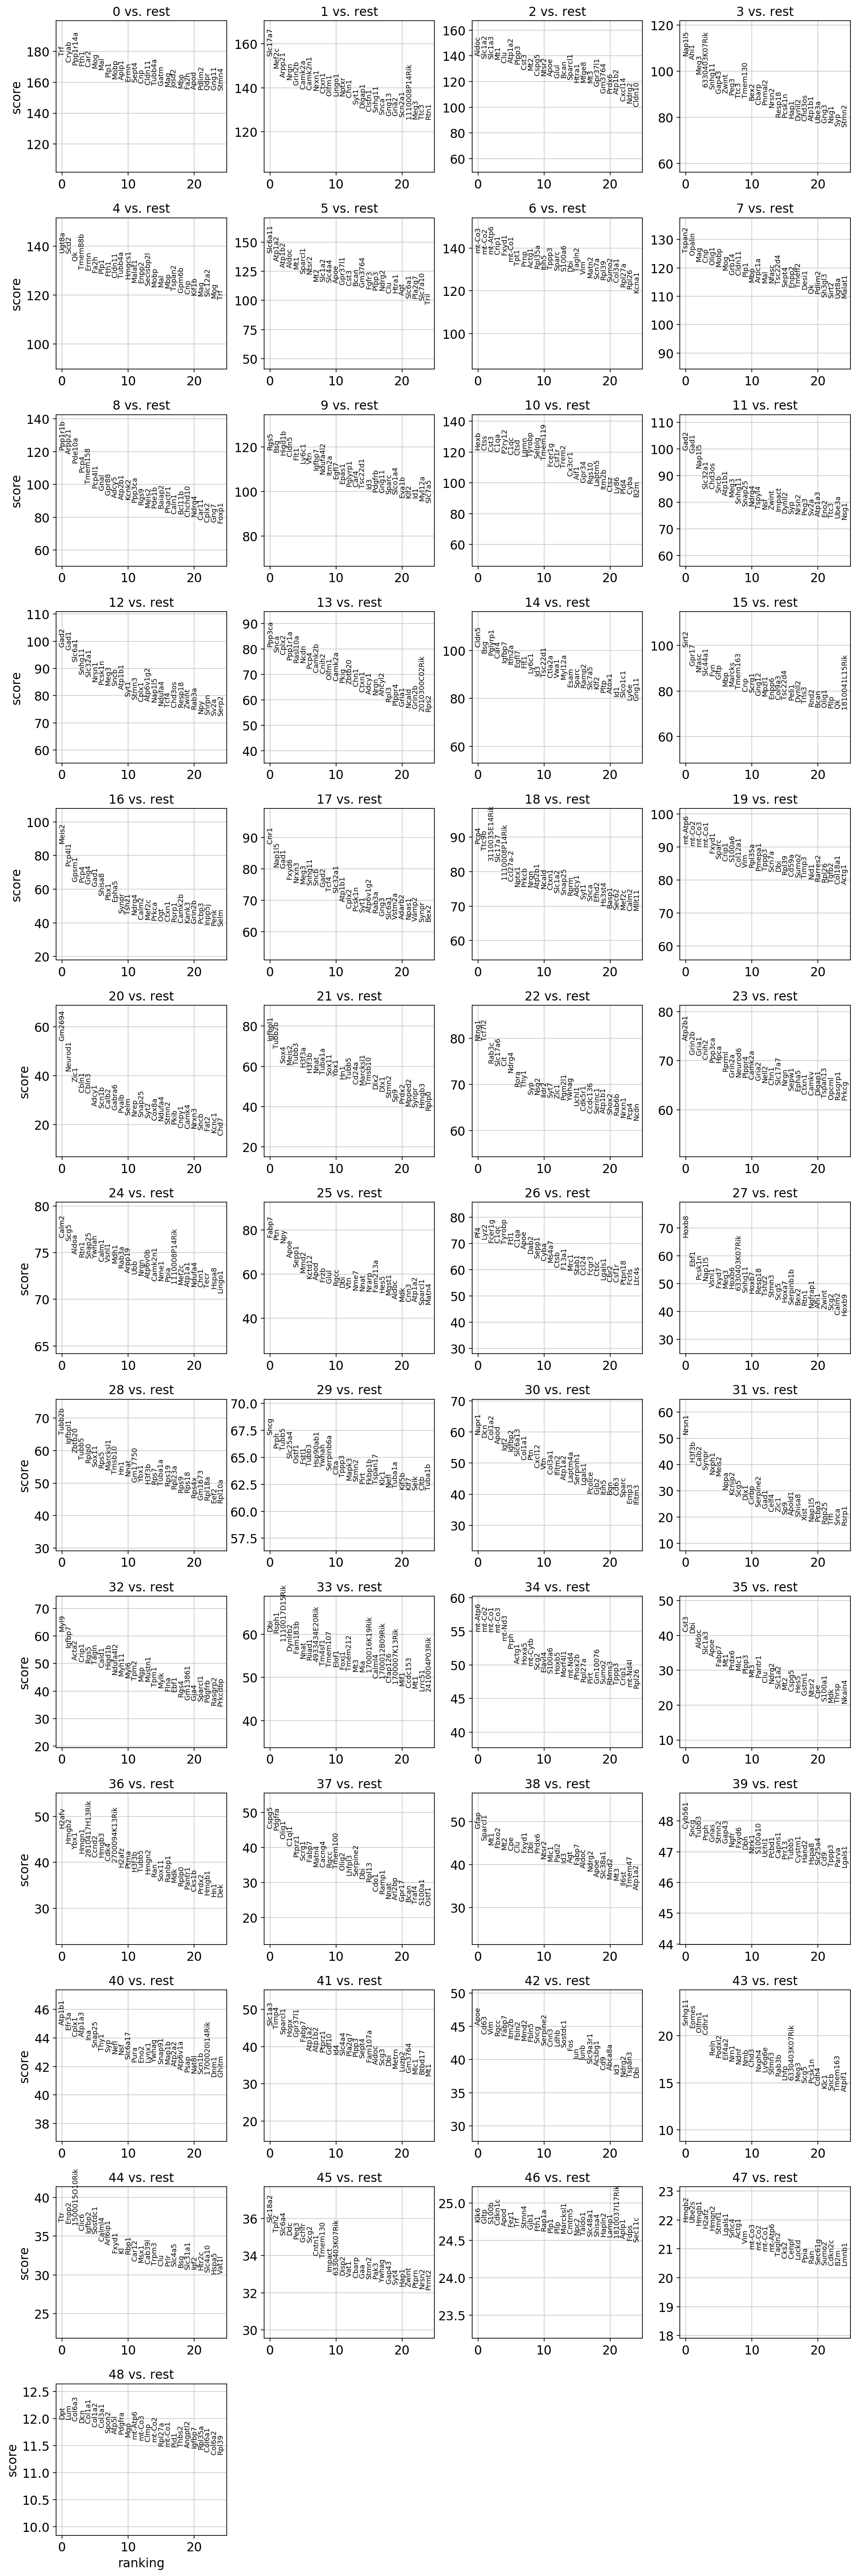

In [51]:
# try wilcoxon, diffxpy
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
# marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']